### PPN (Post-Processing Network)

* Single zone nucleosynthesis code which solves coupled ODEs for for each isotope in your network

* As opposed to MESA (or other SE codes) and MPPNP there is only burn (**no mix**)

* Can be used to for a constant $T$, $\rho$ or trajectory

A **trajectory** follows $T$ and $\rho$ across time (from stellar model or other)

* Fast calculations, qualitatively similar results comapred to multi-zone. Useful for "first-order"
studies and nuclear rate uncertainty calculations. (Denissenkov et al 2014) 

* Can overestimate isotopes made at high $T$

### How to extract a trajectory from a stellar model (one way)

In [1]:
#Load stellar data to select trajectory
%pylab nbagg
from nugridpy import mesa as ms
from nugridpy import ascii_table as at

Populating the interactive namespace from numpy and matplotlib


In [2]:
M45 = ms.history_data('/data/ppm_rpod2/Stellar_models/PopIII/45M_led_mingap_letter_hdf/LOGS/')

Using old history.datasa file ...
 reading ...100% 



<IPython.core.display.Javascript object>


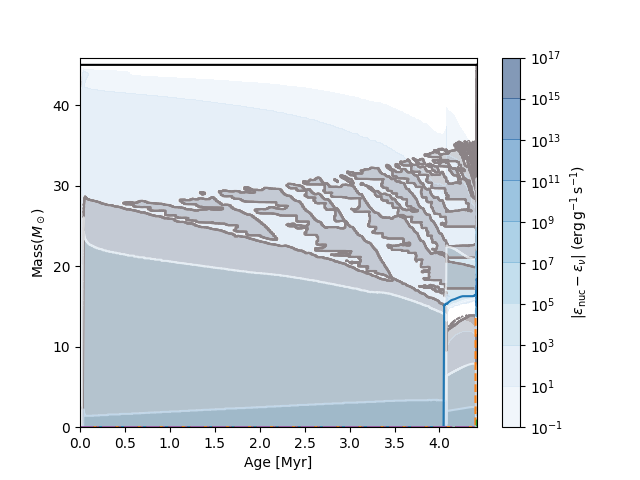

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [3]:
ifig=1;close(ifig);figure(ifig)
M45.kip_cont(ifig=1, mix_zones=50,burn_zones=50,xres=5000,yres=5000,ixaxis='age')

In [4]:
at.writeTraj?

In [8]:
#extract the data we need (age,T,rho)
idx = np.where((M45.get('star_age') > 0) & (M45.get('star_age') < 4e6))
age = M45.get('star_age')[idx][::4]
T_c = M45.get('log_center_T')[idx][::4]
Rho_c = M45.get('log_center_Rho')[idx][::4]

<IPython.core.display.Javascript object>


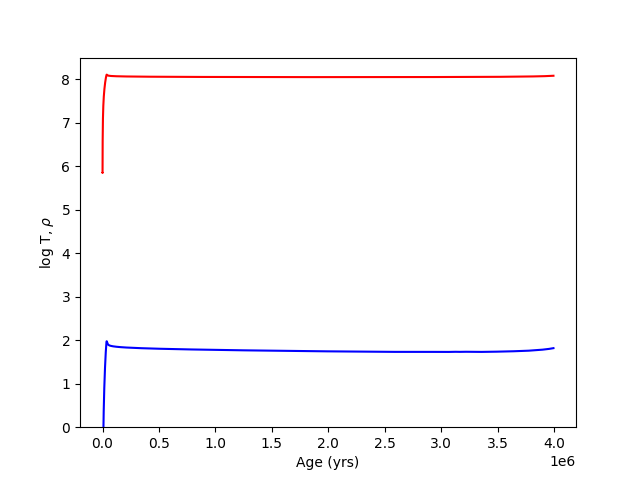

In [9]:
#take a look at the data
ifig=2;close(ifig);figure(ifig)
plt.plot(age,T_c, 'r')
plt.plot(age,Rho_c,'b')
plt.ylim(0,8.5)
plt.ylabel(r'log T, $\rho$')
plt.xlabel(r'Age (yrs)')
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,4))

In [10]:
#need T and Rho not in log
T_c = 10**T_c/1e8
Rho_c = 10**Rho_c
data = [age,T_c,Rho_c]
print(len(T_c))

406


Note: If you want data from a specific mass (not central) coordinate you will have to loop over profiles

In [11]:
#add this to a trajectory file
at.writeTraj(filename='trajectory.input', data=data, \
             ageunit=0, tunit=0, rhounit=0, idNum=0)

In [9]:
%less trajectory.input

### Run the simulation
* Make copy of run directory  
* Add Trajectory file to directory 
* Add initial abundance file to directory
* Check Makefile has correct PCD  
* Open ppn_frame.input and set T9 = 0. This is how the code knows to read the file named trajectory.input. Change IABUINI = 11 and change filename. Also turn flux option on.    

In [12]:

#import sys
#sys.path.append('/home/user/notebooks/Ondrea/NuGridPy')
from nugridpy import ppn

In [33]:
p = ppn.abu_vector(sldir='/home/user/notebooks/Summer_school_ppn_demo/PopIII_traj')

406 cycle numbers found in /home/user/notebooks/Summer_school_ppn_demo/PopIII_traj
Ranging from 00000 to 00405
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files


<IPython.core.display.Javascript object>


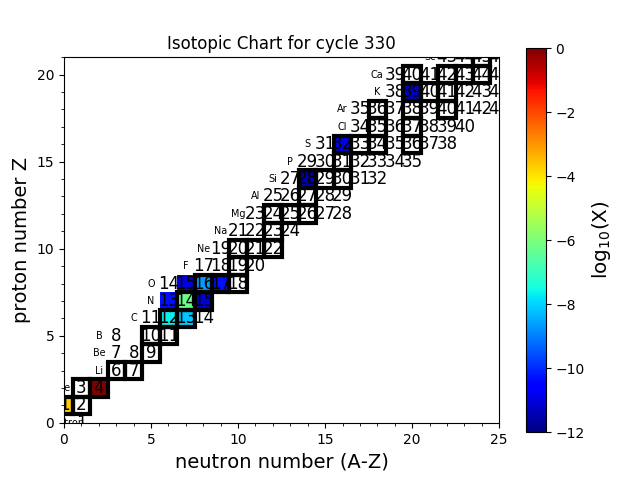

In [21]:
ifig=330;close(ifig);figure(ifig)
p.abu_chart(330,plotaxis=[0, 25, 0, 21])

In [22]:
#Compare to mesa model

In [23]:
M45p=ms.mesa_profile('/data/ppm_rpod2/Stellar_models/PopIII/45M_led_mingap_letter_hdf/LOGS',1634)

1617 in profiles.index file ...
Found and load nearest profile for cycle 1634
reading /data/ppm_rpod2/Stellar_models/PopIII/45M_led_mingap_letter_hdf/LOGS/profile53.data ...
 reading ...100% 

Closing profile tool ...


<IPython.core.display.Javascript object>


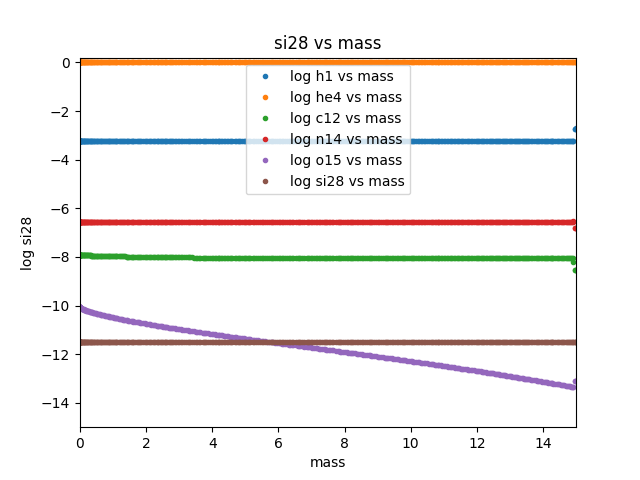

(0, 15)

In [26]:
ifig=4;close(ifig);figure(ifig)
M45p.plot('mass','h1', logy=True)
M45p.plot('mass','he4', logy=True)
M45p.plot('mass','c12', logy=True)
M45p.plot('mass','n14', logy=True)
M45p.plot('mass','o15', logy=True)
M45p.plot('mass','si28', logy=True)
plt.ylim(-15,0.2)
plt.xlim(0,15)

In [34]:
ifig=330;close(ifig);figure(ifig)
%cd /home/user/notebooks/Summer_school_ppn_demo/PopIII_traj/
p.abu_flux_chart(330)

<IPython.core.display.Javascript object>

/home/user/notebooks/Summer_school_ppn_demo/PopIII_traj


<IPython.core.display.Javascript object>

flux_00330.DAT
chart for nucleosynthesis fluxes [dYi/dt]
flux_00330.DAT  read!
plot range given by default


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#Hot CNO as indicated by 13N(p,g)14O and 18O(p,g)19F

Let's change some rates -- maybe $^{18}\mathrm{O}(p,\gamma)^{19}F$ and $^{19}\mathrm{F}(p,\gamma)^{20}Ne$ by a factor of 1000 each (a lot! just for example)  

* Open ppn_physics.input change ININET to 1 and run ppn.exe
* Open your networksetup.txt file and find where these rates are used (set to T - not F) and multiply the rate by 10^3 (second to last column). Save and quit. 
* Open ppn_physics.input again change ININET to 3 and run ppn.exe


<IPython.core.display.Javascript object>


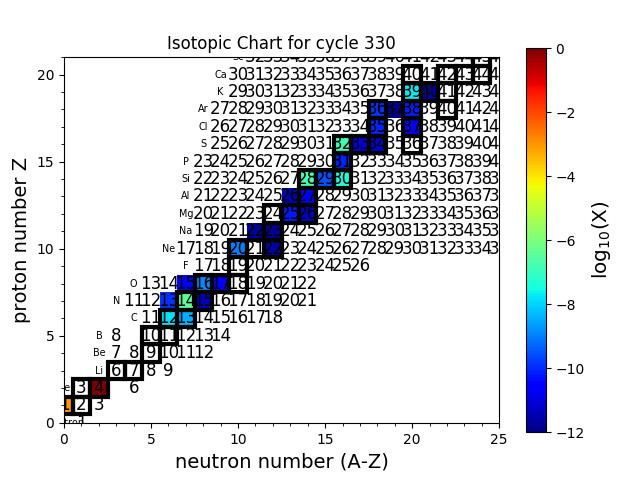

In [47]:
ifig=330;close(ifig);figure(ifig)
p.abu_chart(330,plotaxis=[0, 25, 0, 21])